In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
import math as m
import sympy as smp
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

Имеющиеся экспериментальные данные:

* $R ↦ t$
* комнатная температура (исходная температура образцов), $R_{ambient}$ (измерение R при комнатной температуре)
* приборные константы:
    * масса образца $m$
    * напряжение на нагревателе $U$
    * ток через нагреватель $I$
    * температурный коэффициент сопротивления материала нагревателя $\alpha$

In [2]:
data = {}
work = {}

kinds = ["empty", "brass", "iron"]
colors = {
    "empty": "black",
    "brass": "#808000",
    "iron": "#800080"
}

constants = ll.read_csv("constants.csv")

for kind in kinds:
    data[kind] = ll.read_csv("measurements/%s.csv" % kind)
    work[kind] = ll.varlist()
    ll.add(work[kind],
           constants,
           ll.read_csv("constants/%s.csv" % kind),
           ll.var("R_ambient", data[kind].R[0], data[kind].Error_R[0]))

for kind in kinds:
    disp("Data for kind %s:" % kind, data[kind])

for kind in kinds:
    disp("Work variables for kind %s:" % kind, work[kind])


'Data for kind empty:'

,R,Error_R,t,Error_t
0,18.144,0.005,0,0.5
1,18.194,0.005,40,0.5
2,18.244,0.005,84,0.5
3,18.294,0.005,129,0.5
4,18.344,0.005,175,0.5
5,18.394,0.005,223,0.5
6,18.444,0.005,273,0.5
7,18.494,0.005,325,0.5
8,18.544,0.005,378,0.5
9,18.594,0.005,433,0.5


'Data for kind brass:'

,R,Error_R,t,Error_t
0,18.146,0.005,0,0.5
1,18.196,0.005,44,0.5
2,18.246,0.005,105,0.5
3,18.296,0.005,172,0.5
4,18.346,0.005,243,0.5
5,18.396,0.005,315,0.5
6,18.446,0.005,389,0.5
7,18.496,0.005,465,0.5
8,18.546,0.005,544,0.5
9,18.596,0.005,624,0.5


'Data for kind iron:'

,R,Error_R,t,Error_t
0,18.147,0.005,0,0.5
1,18.197,0.005,46,0.5
2,18.247,0.005,110,0.5
3,18.297,0.005,180,0.5
4,18.347,0.005,252,0.5
5,18.397,0.005,327,0.5
6,18.497,0.005,482,0.5
7,18.547,0.005,562,0.5
8,18.597,0.005,644,0.5
9,18.647,0.005,728,0.5


'Work variables for kind empty:'

,Value,Error
alpha,0.00428,0.000005
U,36.00000,0.100000
I,0.30000,0.010000
T_ambient,24.00000,1.000000
m,1.00000,0.000000
R_ambient,18.14400,0.005000


'Work variables for kind brass:'

,Value,Error
alpha,0.00428,0.000005
U,36.00000,0.100000
I,0.30000,0.010000
T_ambient,24.00000,1.000000
m,0.87800,0.000100
R_ambient,18.14600,0.005000


'Work variables for kind iron:'

,Value,Error
alpha,0.00428,0.000005
U,36.00000,0.100000
I,0.30000,0.010000
T_ambient,25.00000,1.000000
m,0.81650,0.000100
R_ambient,18.14700,0.005000


Будем считать, что зависимость $t(R)$ имеет вид $t(R) = e^{R/C} + B$.

Выразим теплоёмкость образца в калориметре (вместе с теплоёмкостью калориметра) через значение $\frac{\partial t}{\partial R}_{R = R_{ambient}}$:

$$C = \frac{P - \lambda(T - T_{ambient})}{\partial T / \partial t}$$

при $T = T_{ambient}$,

$$C = \frac{P}{(\partial T / \partial t)_{T = T_{ambient}}}$$

Найдём $\frac{\partial T}{\partial t}$:

$$R(T) = R_0(1 + \alpha \Delta T)$$

$$\frac{\partial R}{\partial t} = R_0 \alpha \frac{\partial T}{\partial t}$$

Итак,

$$C = \frac{P}{\frac{\partial T}{\partial t}_{T = T_{ambient}}} = \frac{P R_0 \alpha}{\frac{\partial R}{\partial t}_{R = R_{ambient}}} = P R_0 \alpha \frac{\partial t}{\partial R}_{R = R_{ambient}}$$

В свою очередь,

$$P R_0 \alpha \frac{\partial t}{\partial R}_{R = R_{ambient}} = \frac{P R_{ambient} \alpha \frac{\partial t}{\partial R}_{R = R_{ambient}}}{1 + \alpha \Delta T_{ambient}}$$

In [3]:
def R(kind):
    return data[kind].R
def Rerr(kind):
    return data[kind].Error_R
def t(kind):
    return data[kind].t
def terr(kind):
    return data[kind].Error_t
def t_R_model(x, a, b):
    return ll.exp(x/a) + b
def C(dt_dR_at_ambient, U, I, R_ambient, alpha, T_ambient):
    return (U * I * R_ambient * alpha * dt_dR_at_ambient) / (1 + alpha * T_ambient)
    
t_R_model_args = ["a", "c"]

Построим график $t(R)$.

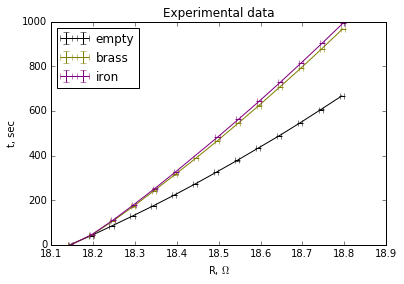

In [4]:
plt.title("Experimental data")
plt.xlabel("R, $\Omega$")
plt.ylabel("t, sec")

for kind in kinds:
    plt.errorbar(x = R(kind), y = t(kind), xerr = Rerr(kind), yerr = terr(kind),
                 label = kind, color = colors[kind])

plt.axis([None, None, 0, None])
plt.legend(loc = "best")

Выполним приближение модельной функции $t(R)$ к экспериментальным данным методом наименьших квадратов и затем Deming regression.

Initial guesses for empty:
       Error        Value
a  0.000173     2.369040
c  1.399899 -2127.700155


'Final guesses for empty:'

,Error,Value
a,0.001544,2.369706
c,12.229929,-2122.372717


Initial guesses for brass:
       Error        Value
a  0.000109     2.269843
c  1.348299 -2988.088183


'Final guesses for brass:'

,Error,Value
a,0.002069,2.270482
c,25.106852,-2980.249898


Initial guesses for iron:
       Error        Value
a  0.000106     2.263437
c  1.348748 -3054.980667


'Final guesses for iron:'

,Error,Value
a,0.001860,2.263916
c,23.259529,-3048.935899


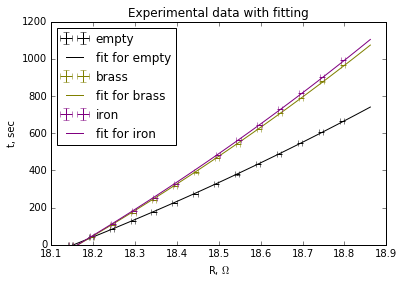

In [5]:
for kind in kinds:
    ll.add(work[kind], ll.fit(name = kind,
                              model = t_R_model,
                              model_args = t_R_model_args,
                              x = R(kind),
                              y = t(kind),
                              xerr = Rerr(kind),
                              yerr = terr(kind)))


plt.title("Experimental data with fitting")
plt.xlabel("R, $\Omega$")
plt.ylabel("t, sec")

R_linspace = ll.linspace([R for R in R(kind) for kind in data])

for kind in kinds:
    plt.errorbar(x = R(kind), y = t(kind), xerr = Rerr(kind), yerr = terr(kind),
                 ls = "none", label = kind, color = colors[kind])
    plt.errorbar(x = R_linspace, y = t_R_model(R_linspace, *work[kind].Value[t_R_model_args]),
                 label = "fit for %s" % kind, color = colors[kind])

plt.axis([None, None, 0, None])
plt.legend(loc = "best")


Используя полученные коэффициенты, продифференцируем модельную функцию $t(R)$ по $R$ в точке $R_{ambient}$ и подставим значения в основную формулу.

Таким образом найдём полную теплоёмкость пустого калориметра, после чего модифицируем основную формулу и для каждого из образцов будем находить удельную теплоёмкость образца: $c = \frac{C - C_{empty}}{m}$.

In [6]:
sym_R = smp.symbols("R")
sym_t_R_args = smp.symbols(t_R_model_args)
sym_t_R_model = t_R_model(sym_R, *sym_t_R_args)
dt_dR = smp.diff(sym_t_R_model, sym_R)

print("t(R): %s" % sym_t_R_model)
print("dt/dR: %s" % dt_dR)

#
# Generate final symbolic expression for C.
#

sym_U, sym_I, sym_R_ambient, sym_alpha, sym_T_ambient, sym_m = smp.symbols("U I R_ambient alpha T_ambient m")
sym_C = C(U = sym_U,
          I = sym_I,
          R_ambient = sym_R_ambient,
          alpha = sym_alpha,
          T_ambient = sym_T_ambient,
          dt_dR_at_ambient = dt_dR.subs(sym_R, sym_R_ambient))
print("Symbolic formula for C: %s" % sym_C)

#
# Now compute its error as square root of sum of squares of products of
# partial differentials of C for each variable by absolute error of the corresponding variable.
#

ll.add_multi(work.values(), ll.sym_compute("C_empty", sym_C, work["empty"]))
disp("C for empty:", work["empty"].loc[["C_empty"]])

for kind in set(kinds) - set(["empty"]):
    ll.add(work[kind], ll.sym_compute("C", sym_C, work[kind]))
    disp("C for %s:" % kind, work[kind].loc[["C"]])

sym_C_empty = smp.symbols("C_empty")
sym_C = (sym_C - sym_C_empty) / sym_m

for kind in set(kinds) - set(["empty"]):
    ll.add(work[kind], ll.sym_compute("C_sp", sym_C, work[kind]))
    disp("Specific C for %s:" % kind, work[kind].loc[["C_sp"]])
    

t(R): c + exp(R/a)
dt/dR: exp(R/a)/a
Symbolic formula for C: I*R_ambient*U*alpha*exp(R_ambient/a)/(a*(T_ambient*alpha + 1))


'Error influence estimations for C_empty:'

,Error,Derivative,(E*D)^2
I,0.01,2262.34145069088,511.818883951409
R_ambient,0.005,323.814262146972,2.62139190924470
T_ambient,1,-2.63425567930851,6.93930298396916
U,0.1,18.8528454224240,3.55429780521812
a,0.00154384,-2479.33081787981,14.6512239606983
alpha,5e-06,143803.808155107,0.516988380997771


'C for empty:'

,Value,Error
C_empty,678.702435,23.240097


'Error influence estimations for C:'

,Error,Derivative,(E*D)^2
I,0.01,3302.81096964515,1090.85603012083
R_ambient,0.005,491.006070109844,6.02717402211783
T_ambient,1,-3.84577162382506,14.7899593826181
U,0.1,27.5234247470429,7.57538909806135
a,0.00206907,-3924.18655663624,65.9250176780298
alpha,5e-06,209940.367271435,1.10187394525163


'C for brass:'

,Value,Error
C,990.843291,34.44235


'Error influence estimations for C:'

,Error,Derivative,(E*D)^2
I,0.01,3378.64615954857,1141.52498714323
R_ambient,0.005,503.571765985304,6.33961308743895
T_ambient,1,-3.91886329617016,15.3574895340697
U,0.1,28.1553846629048,7.92725685516134
a,0.00185983,-4036.50940913746,56.3582919944348
alpha,5e-06,213930.435855215,1.14415578463005


'C for iron:'

,Value,Error
C,1013.593848,35.05213


'Error influence estimations for C_sp:'

,Error,Derivative,(E*D)^2
C_empty,23.2401,-1.13895216400911,700.626928294707
I,0.01,3761.74370119038,1415.07156734455
R_ambient,0.005,559.232426093216,7.81852265985262
T_ambient,1,-4.38014991324039,19.1857132624598
U,0.1,31.3478641765865,9.82688588433714
a,0.00206907,-4469.46077065631,85.5187261352289
alpha,5e-06,239112.035616669,1.42936413941868
m,0.0001,-404.912873644132,0.00163954435242748


'Specific C for brass:'

,Value,Error
C_sp,355.513503,47.323138


'Error influence estimations for C_sp:'

,Error,Derivative,(E*D)^2
C_empty,23.2401,-1.22473974280465,810.146348511637
I,0.01,4137.96222847345,1712.27314042730
R_ambient,0.005,616.744355156527,9.50933999043601
T_ambient,1,-4.79958762543804,23.0360413742580
U,0.1,34.4830185706121,11.8907856974118
a,0.00185983,-4943.67349557557,84.5367299965385
alpha,5e-06,262009.106987403,1.71621930360841
m,0.0001,-502.332911947827,0.00252338354425983


'Specific C for iron:'

,Value,Error
C_sp,410.154823,51.50836


В результате получаем теплоёмкости:
- пустого калориметра $670 \pm 20 \frac{Дж}{К}$;
- образца из латуни (вместе с калориметром) $990 \pm 30 \frac{Дж}{К}$;
- образца из железа (вместе с калориметром) $1010 \pm 30 \frac{Дж}{К}$.

Вычитая теплоёмкость пустого калориметра и приводя к удельной теплоёмкости:
- образца из латуни $350 \pm 40 \frac{Дж}{кг * К}$ ($11\%$);
- образца из железа $410 \pm 50 \frac{Дж}{кг * К}$ ($12\%$).

'Final guesses for empty:'

,Error,Value
a,0.046474,-1.904617
b,48.406527,1609.767673
c,0.047027,20.051085


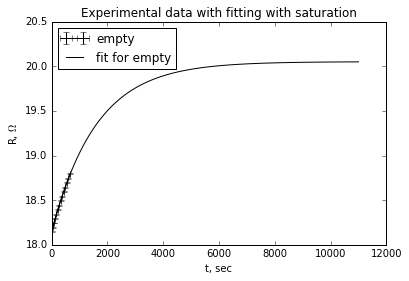

In [7]:
def R_t_model(x, a, b, c):
    return a * ll.exp(-x/b) + c
    
R_t_model_args = ["a", "b", "c"]

kind = "empty"

R_t_fit =  ll.fit(name = kind,
                  model = R_t_model,
                  model_args = R_t_model_args,
                  x = t(kind),
                  y = R(kind), xerr = terr(kind), yerr = Rerr(kind), initial = [-2, 1600, 20])

plt.title("Experimental data with fitting with saturation")
plt.ylabel("R, $\Omega$")
plt.xlabel("t, sec")

t_linspace = ll.linspace([t for t in t(kind) for kind in data] + [10000])


plt.errorbar(x = t(kind), y = R(kind), xerr = terr(kind), yerr = Rerr(kind),
             label = kind, color = colors[kind])
plt.errorbar(x = t_linspace, y = R_t_model(t_linspace, *R_t_fit.Value[R_t_model_args]),
             label = "fit for %s" % kind, color = colors[kind])

plt.axis([0, None, None, None])
plt.legend(loc = "best")

In [8]:
d = work["empty"]
R_0 = d.Value["R_ambient"] / (1 + d.Value["alpha"] * d.Value["T_ambient"])

R_sat = R_t_fit.Value["c"]
disp("R_sat", R_sat)

T_sat = (R_sat/ R_0 - 1) / d.Value["alpha"]
disp("T_sat", T_sat)

coef = d.Value["U"]*d.Value["I"] / (T_sat - d.Value["T_ambient"])
disp("coef", coef)

'R_sat'

20.051084841879902

'T_sat'

51.080611041545687

'coef'

0.39880931724292307